# Email Spam Filtering-Task-3

 ''' Use a dataset of emails and build a model that
can identify spam emails.
The SMS Spam Collection is a set of SMS tagged messages that have been␣
↪collected for SMS Spam research.
It contains one set of SMS messages in English of 5,572 messages,
tagged acording being ham (legitimate) or spam.

'''Email spam filtering is a technique used to automatically identify and
categorize unwanted or unsolicited emails, commonly known as spam, from␣
↪legitimate and
relevant emails in a user's inbox. The goal of email spam filtering is to␣
↪reduce the clutter in users' email accounts,
enhance security by minimizing the risk of phishing and malware attacks, and␣
↪improve the overall email experience.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
# Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv(f'C:\\Users\\abhin\\Desktop\\Data_set\\spam1.csv',encoding='IBM437')

In [17]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ╠_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [22]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will ╠_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [23]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ╠_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [25]:
 columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]

In [27]:
df.drop(columns=columns_to_drop,inplace=True)

In [28]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ╠_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [29]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [30]:
new_column_names = {"v1":"Category","v2":"Message-in-email"}
df.rename(columns = new_column_names,inplace = True)

In [31]:
df

,Category,Message-in-email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ╠_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
df.head(15)

,Category,Message-in-email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [34]:
df.describe()

,Category,Message-in-email
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category          5572 non-null   object
 1   Message-in-email  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [36]:
df.shape

(5572, 2)

In [39]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [41]:
X = df["Message-in-email"]
Y = df["Category"]

In [42]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ╠_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message-in-email, Length: 5572, dtype: object


In [44]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
random_state = 3)

In [46]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [47]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [48]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english",
lowercase=True)

In [49]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [50]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [51]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message-in-email, Length: 4457, dtype: object


In [52]:
print(X_train_features)

  (0, 731)	0.32207229533730536
  (0, 3977)	0.2411608243124387
  (0, 4295)	0.3893042361045832
  (0, 6602)	0.20305518394534605
  (0, 3383)	0.32207229533730536
  (0, 2116)	0.38519642807943744
  (0, 3132)	0.4403035234544808
  (0, 3258)	0.258880502955985
  (0, 3377)	0.21816477736422235
  (0, 4513)	0.2910887633154199
  (1, 4060)	0.380431198316959
  (1, 6875)	0.4306015894277422
  (1, 6419)	0.4769136859540388
  (1, 6444)	0.5652509076654626
  (1, 7448)	0.35056971070320353
  (2, 923)	0.4917598465723273
  (2, 2103)	0.42972812260098503
  (2, 3914)	0.40088501350982736
  (2, 2220)	0.413484525934624
  (2, 5826)	0.4917598465723273
  (3, 6142)	0.4903863168693604
  (3, 1592)	0.5927091854194291
  (3, 1835)	0.3708680641487708
  (3, 7458)	0.5202633571003087
  (4, 2527)	0.7419319091456392
  :	:
  (4452, 2116)	0.3092200696489299
  (4453, 989)	0.6760129013031282
  (4453, 7278)	0.5787739591782677
  (4453, 1755)	0.45610005640082985
  (4454, 3025)	0.42618909997886
  (4454, 2080)	0.3809693742808703
  (4454, 3084)

**Logical_Regression**

In [53]:
# Create a logistic regression model and train it on the training data
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [54]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [55]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.965896342831501


In [56]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [57]:
 print("Accuracy on test data:",accuracy_on_test_data)

Accuracy on test data: 0.9623318385650225


In [62]:
# Test the model with some custom email messages
input_your_mail = ["Congratulations! You have won a free vacation to an exoticdestination.Click the link to claim your prize now!"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)
# Print the prediction result
if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")       
                   

[0]
Spam Mail


In [65]:
input_your_mail = ["Meeting reminder: Tomorrow, 10 AM, conference room. See you␣there!"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)
# Print the prediction result
if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


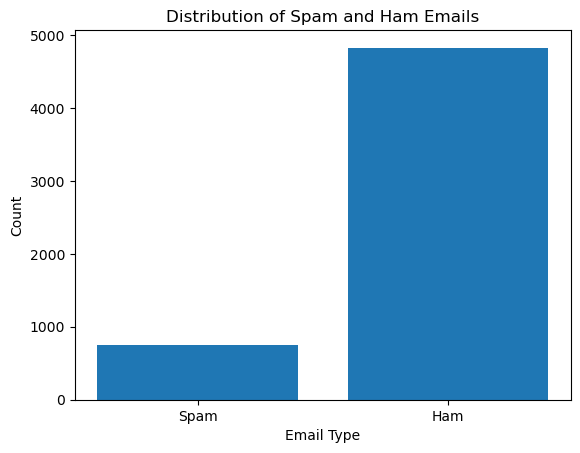

In [67]:
spam_count = df[df['Category'] == 0].shape[0]
ham_count = df[df['Category'] == 1].shape[0]
plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

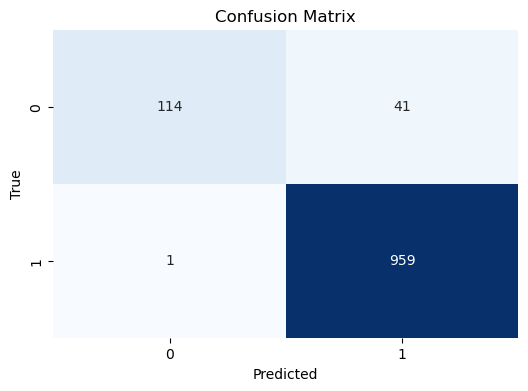

In [68]:
# Data visualization - Confusion Matrix
cm = confusion_matrix(Y_test, prediction_on_test_data)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

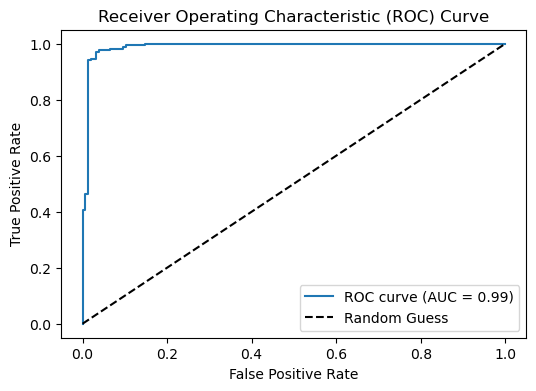

In [69]:
# Data visualization - ROC Curve
probabilities = model.predict_proba(X_test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)
roc_auc = roc_auc_score(Y_test, probabilities)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

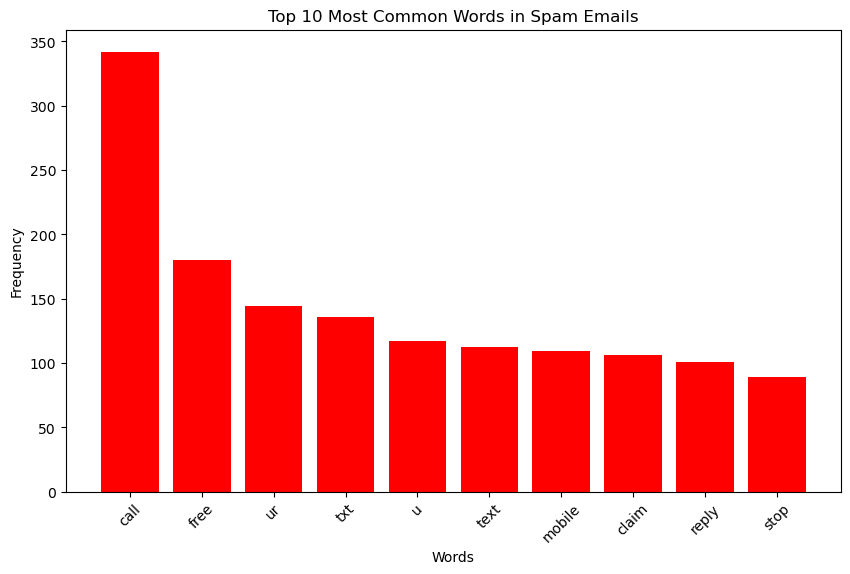

In [73]:
# Data visualization - Top 10 Most Common Words in Spam Emails
stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message-in-email']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message-in-email']).split()
spam_word_freq = Counter([word.lower() for word in spam_words if word.lower()
not in stop_words and word.isalpha()])
plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='r')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

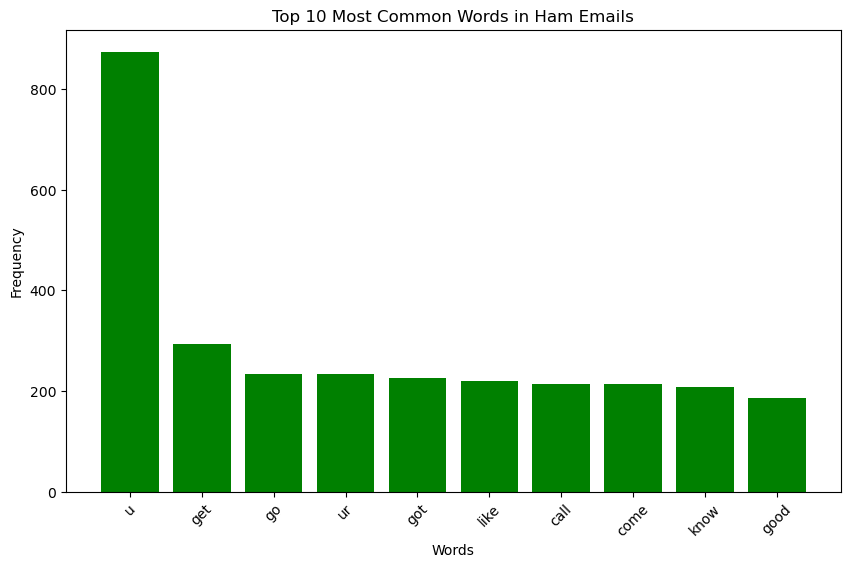

In [77]:
# Data visualization - Top 10 Most Common Words in Ham Emails
ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not
in stop_words and word.isalpha()])
plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df['Category'].value_counts()

Category
1    4825
0     747
Name: count, dtype: int64

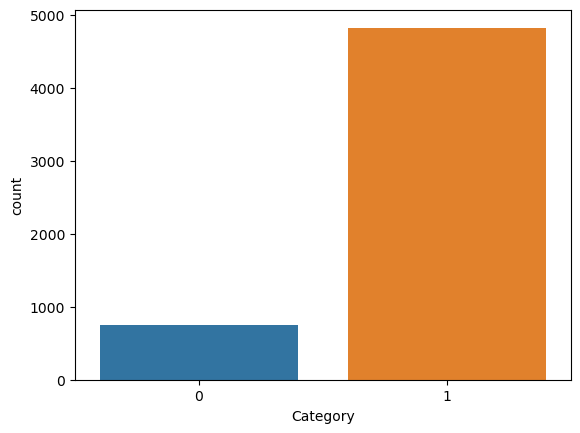

In [80]:
sns.countplot(x='Category', data=df)
plt.show()

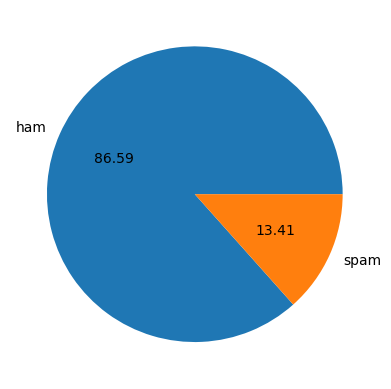

In [81]:
#pie chart representation of the mails-spam and ham
plt.pie(df["Category"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()